<a href="https://colab.research.google.com/github/luthfialghz/Capstone-Project---DewPet-Bangkit-2022/blob/machine_learning/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
dataframe = pd.read_csv('project_dataset.csv')
dataframe.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas


In [3]:
traintest = dataframe.copy()
#traintest.drop(['Animal Type'], axis=1, inplace=True)
traintest.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Dog,Ear Hematomas


In [4]:
label_encoder = LabelEncoder()
traintest.loc[:,"Animal Type"] = label_encoder.fit_transform(traintest.iloc[:,-2])

In [5]:
X = traintest.drop(['Diagnosis'], axis=1)
Y = traintest['Diagnosis']
X.head()

,Abdominal Pain,Abnormal Elevation of Inner Eyelid,Abnormal Coloration of One or More Teeth,Abnormal Posture,Abnormal Nail Color,Bad Odor,Bad Breath,Bleeding,Bleeding Gums,Blood in Urine/Feses,...,Swelling,Squinting,Seizures,Unwillingness to Move,Vomiting,Vision Loss/Blindness,Weight Loss,Whitish-appearing Pupil,Yeasty Smell,Animal Type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
x_kolom = list(X.columns.values)
len(x_kolom)

92

In [7]:
X_train = np.array(X.iloc[:-56,:])
X_test = np.array(X.iloc[-56:,:])

Y_train = np.array(Y.iloc[:-56])
Y_test = np.array(Y.iloc[-56:])

In [8]:
Y_test

array(['Ear Hematomas', 'Ear Infections', 'Retinal Hemorrhage',
       'Blepharitis', 'Cataracts', 'Conjunctivitis', 'Horner’s Syndrome',
       'Ectropion', 'Eyeworms', 'Glaucoma', 'Epiphora',
       'Dental abscesses', 'Anal sac abscess', 'Atopic Dermatitis',
       'Bacterial Infection', 'Nail Disorders', 'Lockjaw', 'Halitosis',
       'Ptyalism', 'Oral Ulceration', 'Epulis', 'Otitis Media',
       'Otitis Interna', 'Iris Bombe - Complete Posterior Synechiae',
       'Uveitis', 'Inflammation of the Eye', 'Blepharitis',
       'Dry Eye Syndrome', 'Claw and Nail Disorders', 'Chiggers',
       'Ear Mites', 'Otitis Externa', 'Vestibular Disease',
       'Exophthalmos', 'Hyperemia', 'Red Eye', 'Pyoderma', 'Pruritus',
       'Incisor Malocclusion', 'Molar', 'Premolar', 'Elongation',
       'Ptyalism', 'Apical Abscesses', 'Tooth Abscess', 'Cleft Palate',
       'Gingivitis', 'Laryngeal Paralysis', 'Oral Ulceration',
       'Chronic Ulcerative Paradental Stomatitis', 'Stomatitis', 'Epulis',

In [9]:
X_train.shape

(348, 92)

In [10]:
Y_train_encode = pd.get_dummies(Y_train)
Y_train_encode.shape

(348, 52)

In [11]:
Y_test_encode = pd.get_dummies(Y_test)
Y_test_encode.shape

(56, 52)

In [12]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64, activation='relu', input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(92, activation='relu', input_shape = (X_train.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 92)                8556      
                                                                 
 dense_1 (Dense)             (None, 64)                5952      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 52)                3380      
                                                                 
Total params: 22,048
Trainable params: 22,048
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [14]:
# train model
history = model.fit(X_train, Y_train_encode, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 1s 23ms/step - loss: 3.9480 - accuracy: 0.0252 - val_loss: 3.8922 - val_accuracy: 0.0571
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 3.8311 - accuracy: 0.1942 - val_loss: 3.8042 - val_accuracy: 0.1857
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 3.7074 - accuracy: 0.2698 - val_loss: 3.6933 - val_accuracy: 0.2429
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 3.5188 - accuracy: 0.2878 - val_loss: 3.5342 - val_accuracy: 0.2286
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 3.2446 - accuracy: 0.3022 - val_loss: 3.3169 - val_accuracy: 0.2286
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 2.9161 - accuracy: 0.3201 - val_loss: 3.0416 - val_accuracy: 0.2571
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 2.5676 - accuracy: 0.3741 - val_loss: 2.7297 - val_accuracy: 0.2714
Epoch 8/50
9/9 [=================

In [ ]:
import matplotlib.pyplot as plt


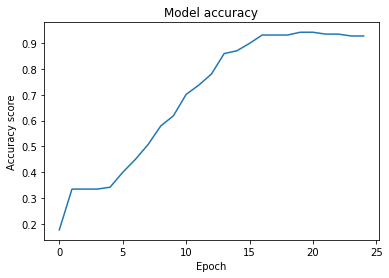

In [ ]:
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

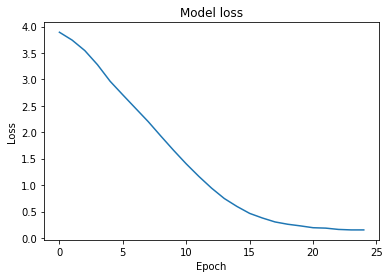

In [ ]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

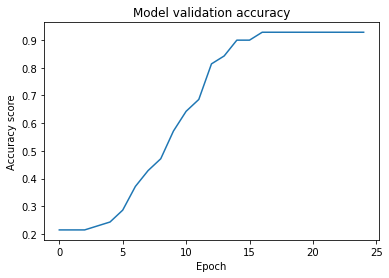

In [ ]:
plt.plot(history.history["val_accuracy"])
plt.title("Model validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()

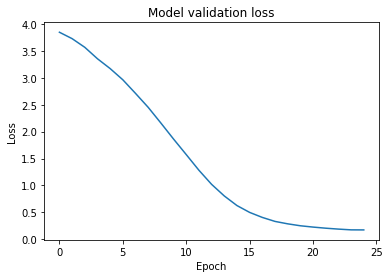

In [ ]:
plt.plot(history.history["val_loss"])
plt.title("Model validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model.zip/assets


In [ ]:
model.evaluate(X_test, Y_test_encode)

2/2 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9107


[0.20569775998592377, 0.9107142686843872]

In [ ]:
label_encoder2 = LabelEncoder()
labels = label_encoder2.fit_transform(Y_test)

result = label_encoder2.inverse_transform(np.argmax(model.predict(X_test[:1]),axis=-1))

print("Test Data :")
print('{"intances": [\n',np.array2string(X_test[0], separator=', '),'\n]}')
print("Expected Result:",result)

Test Data :
{"intances": [
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 
]}
Expected Result: ['Ear Hematomas']


In [ ]:
label_encoder2 = LabelEncoder()
labels = label_encoder2.fit_transform(Y_test)

result = label_encoder2.inverse_transform(np.argmax(model.predict(X_test[:1]),axis=-1))

X_string = []

for i in range(len(X_test)):
  row_string = []
  for j in range(len(X_test[i])):
    if(X_test[i][j]==1):
      if(j == 91):
        if(X_test[i][j]==1):
          row_string.append('Dog')
        elif(X_test[i][j]==2):
          row_string.append('Cat')
        elif(X_test[i][j]==3):
          row_string.append('Rabbit')
        continue
      row_string.append(x_kolom[j])
  X_string.append(row_string)

print("Test Data :")
print('{"intances": [\n',np.array(X_string[0]),'\n]}')
print("Expected Result:",result)

Test Data :
{"intances": [
 ['Bad Odor' 'Crust in The Ear' 'Ear Redness' 'Ear Odor' 'Itching Ear'
 'Pain' 'Dog'] 
]}
Expected Result: ['Ear Hematomas']


In [ ]:
label_encoder2 = LabelEncoder()
label_encoder2.fit_transform(Y_test)

def diagnose(data):
  predict = model.predict(data)
  result = label_encoder2.inverse_transform(np.argmax(predict, axis=1))
  return result[0]
  #return data

In [ ]:
diagnose(X_test[:1])

'Ear Hematomas'

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 66%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 88%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model.zip/ (stored 0%)
  adding: content/saved_model/my_model.zip/variables/ (stored 0%)
  adding: content/saved_model/my_model.zip/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: content/saved_model/my_model.zip/variables/variables.index (deflated 66%)
  adding: content/saved_model/my_model.zip/keras_metadata.pb (deflated 88%)
  adding: content/saved_model/my_model.zip/saved_model.pb (deflated 89%)
  adding: conten